In [1]:
#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')


import all_nu_analysis as ana
import images_and_coalignment as iac
import visualize_dem_results as viz


import pickle
import pathlib
import importlib
import numpy as np
import subprocess
from matplotlib import pyplot as plt


Manual flarefinding.

In [3]:
import pandas as pd
import astropy.time
df = pd.read_csv('fpmA.csv')
starts = df['flare_start'].values
stops = df['flare_end'].values

astropy.time.Time(starts[0])

<Time object: scale='utc' format='isot' value=2015-09-01T03:59:48.000>

In [3]:
astropy.time.Time('2015-09-01 03:50:00')

<Time object: scale='utc' format='iso' value=2015-09-01 03:50:00.000>

In [33]:
keys = ['01-sep-15', '02-sep-15',
        '19-feb-16', '22-apr-16_2', '26-jul-16_1', '27-jul-16_1', '26-jul-16_2',
        '11-sep-17', '12-sep-17', '13-sep-17', '10-oct-17',
        '29-may-18_1', '09-sep-18', '10-sep-18', 
        '12-apr-19', '13-apr-19', 
        '06-jun-20', '07-jun-20', 
        '08-jun-20', '09-jun-20',
        '29-apr-21', '03-may-21_1', '03-may-21_2', '20-jul-21', 
        '30-jul-21_1', 
        '30-jul-21_2']

with open('all_targets.pickle', 'rb') as f:
    all_targets = pickle.load(f)
    

Notes:

Added:
- '22-apr-16_2' has two pretty gradual flares (added two manual flares to get the beginings of the rises into the flare category)
- '11-sep-17' first orbit is "transient" (rolling bumps) nearly the whole time. Added two new intervals to account for this.
- '11-sep-17' last orbit has transient at start that was missed, added.
- '12-sep-17' second orbit, two flaring intervals are sections of longer flare, added whole flare.
- '29-may-18_1' second orbit, flare doesn't start soon enough. added section.
- '12-apr-19' two events added (one fainter one missed in middle of orbit, and orbit-start-associated decline in another).
- '12-apr-19' two events added (both gaps in flare coverage during overlapping/multi-peak transients).
- '06-jun-20' orbit one two events added to cover whole orbit (all flares)
- '07-jun-20' two events added (one earlier start, one gap in multi-peak)
- '08-jun-20' flare added at start of orbit 2
- '29-apr-21' last orbit; flare doesn't start soon enough. added section.
- '03-may-21' last orbit; flare doesn't start soon enough. added section.
- '20-jul-21' added three events (misc)


Did not add but marginal:
- '27-jul-16_1' region 0 - some potential variability.
- '11-sep-17' not sure how to handle middle two orbits... will return.
- '12-sep-17' also unclear on what counts as flaring, return.
- '20-jul-21' ambiguity in last orbit (~12:10)

Flare removal?
- Two events in '10-oct-17' orbit 3 do not appear to really be flares.
- 

19-41-40 20-42-13
Using 1s GOES flux ("flx1s")


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/jmdunca2/nustar/jul-2021/90710202001//event_cl/nu90710202001A06_cl.evt
/Users/jmdunca2/nustar/jul-2021/90710202001/event_cl/nu90710202001A06_cl_sunpos.evt
d
Loading coordinates from pickle: ./centroid_coordinates/d_90710202001_fpmA_3s_RAW_centroid.pkl
/Users/jmdunca2/nustar/jul-2021/90710202001/event_cl/nu90710202001A06_cl_sunpos.evt
/Users/jmdunca2/nustar/jul-2021/90710202001//event_cl/nu90710202001B06_cl.evt
/Users/jmdunca2/nustar/jul-2021/90710202001/event_cl/nu90710202001B06_cl_sunpos.evt
d
Loading coordinates from pickle: ./centroid_coordinates/d_90710202001_fpmB_3s_RAW_centroid.pkl
/Users/jmdunca2/nustar/jul-2021/90710202001/event_cl/nu90710202001A06_cl_sunpos.evt
2021-07-30 19:42:16.500315+00:00
2021-07-30 20:03:56.500315+00:00

2021-07-30 20:04:14.500315+00:00
2021-07-30 20:25:30.500315+00:00

2021-07-30 20:26:26.500315+00:00
2021-07-30 20:41:42.500315+00:00




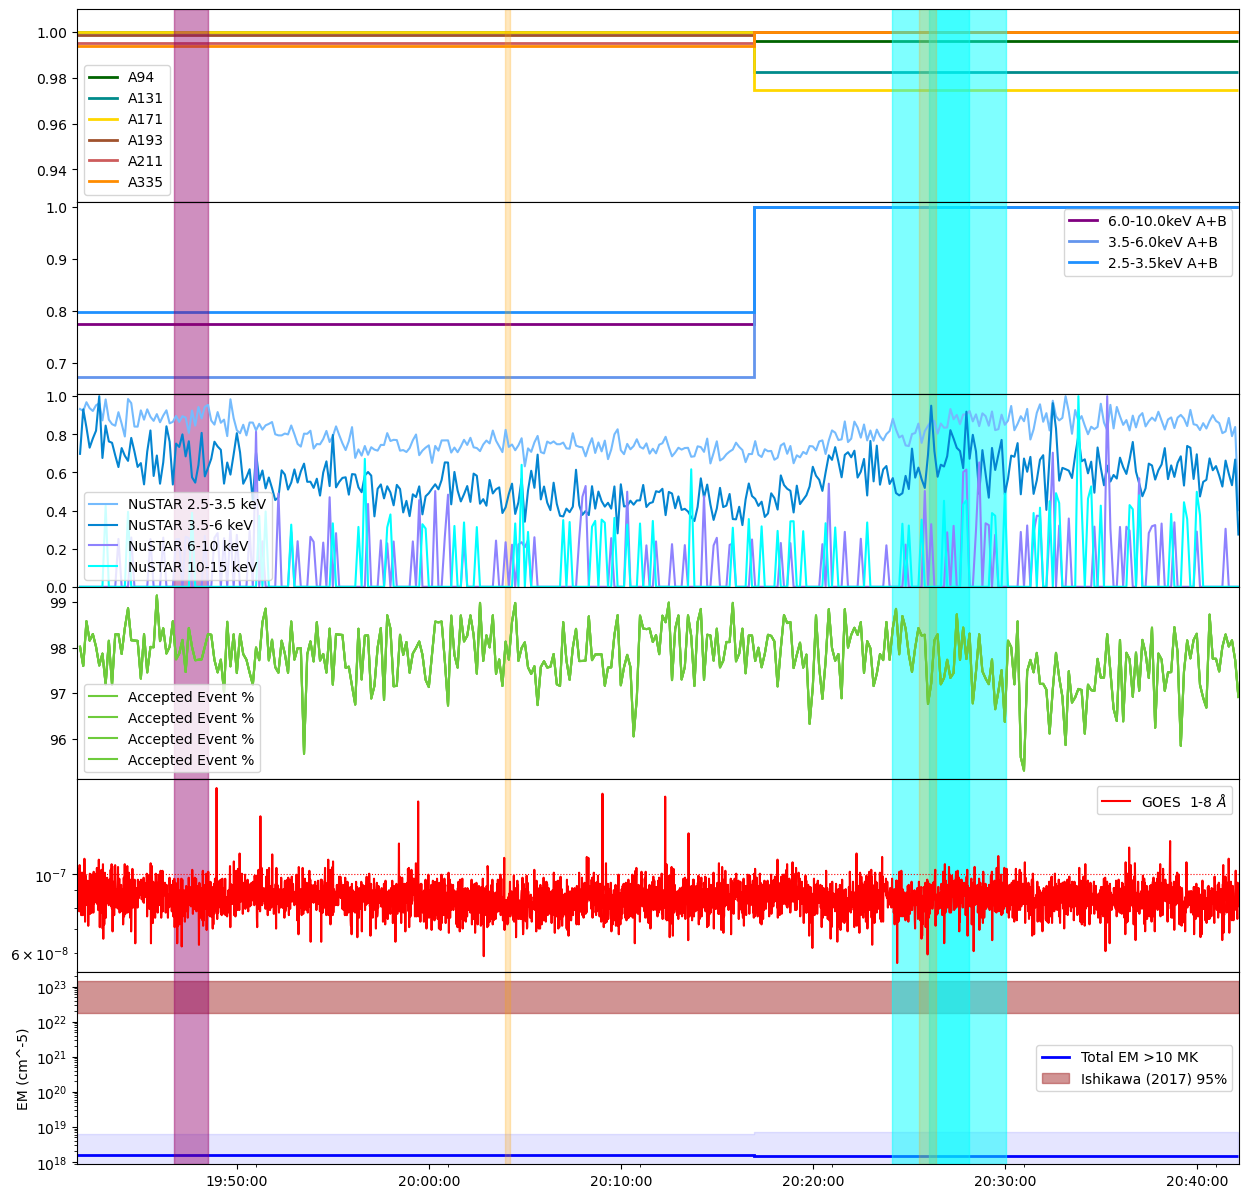

In [40]:
#summary lightcurves for all orbits/all regions
importlib.reload(ana)
ki=25

k=keys[ki]
method = all_targets[k]['method']
ana.make_summary_lcs(k, method=method, show=True, goes=True)

In [4]:
mfts = []
mfts.append([astropy.time.Time('2016-04-22 20:40:00'), astropy.time.Time('2016-04-22 20:45:00')])
mfts.append([astropy.time.Time('2016-04-22 22:35:00'), astropy.time.Time('2016-04-22 22:45:00')])

mfts.append([astropy.time.Time('2017-09-11 16:05:00'), astropy.time.Time('2017-09-11 16:40:00')])
mfts.append([astropy.time.Time('2017-09-11 20:40:00'), astropy.time.Time('2017-09-11 20:48:00')])

mfts.append([astropy.time.Time('2017-09-12 22:58:00'), astropy.time.Time('2017-09-12 23:15:00')])
mfts.append([astropy.time.Time('2017-09-12 21:42:00'), astropy.time.Time('2017-09-12 21:50:00')])

mfts.append([astropy.time.Time('2018-05-29 17:34:00'), astropy.time.Time('2018-05-29 17:40:00')])
mfts.append([astropy.time.Time('2018-05-29 16:01:00'), astropy.time.Time('2018-05-29 16:03:00')])
mfts.append([astropy.time.Time('2018-05-29 16:10:00'), astropy.time.Time('2018-05-29 16:14:00')])

mfts.append([astropy.time.Time('2019-04-12 17:12:00'), astropy.time.Time('2019-04-12 17:25:00')])
mfts.append([astropy.time.Time('2019-04-12 18:20:00'), astropy.time.Time('2019-04-12 18:30:00')])

mfts.append([astropy.time.Time('2019-04-13 04:25:00'), astropy.time.Time('2019-04-13 04:40:00')])
mfts.append([astropy.time.Time('2019-04-13 06:10:00'), astropy.time.Time('2019-04-13 06:27:00')])

mfts.append([astropy.time.Time('2020-06-06 19:35:00'), astropy.time.Time('2020-06-06 19:45:00')])
mfts.append([astropy.time.Time('2020-06-06 19:55:00'), astropy.time.Time('2020-06-06 20:10:00')])

mfts.append([astropy.time.Time('2020-06-07 19:49:00'), astropy.time.Time('2020-06-07 19:58:00')])
mfts.append([astropy.time.Time('2020-06-07 21:27:00'), astropy.time.Time('2020-06-07 21:30:00')])

mfts.append([astropy.time.Time('2020-06-08 21:00:00'), astropy.time.Time('2020-06-08 21:05:00')])


mfts.append([astropy.time.Time('2021-04-29 21:28:00'), astropy.time.Time('2021-04-29 21:40:00')])

mfts.append([astropy.time.Time('2021-05-03 17:37:00'), astropy.time.Time('2021-05-03 17:50:00')])

mfts.append([astropy.time.Time('2021-07-20 08:47:00'), astropy.time.Time('2021-07-20 09:00:00')])
mfts.append([astropy.time.Time('2021-07-20 10:00:00'), astropy.time.Time('2021-07-20 10:07:00')])
mfts.append([astropy.time.Time('2021-07-20 11:45:00'), astropy.time.Time('2021-07-20 11:50:00')])

for m in mfts:
    print(m[0].strftime('%D %H-%M-%S'), m[1].strftime('%D %H-%M-%S'))


data = {'manual_flares': mfts}

with open('manual_flares.pickle', 'wb') as f:
     # Pickle the 'data' dictionary using the highest protocol available.
     pickle.dump(data, f, pickle.HIGHEST_PROTOCOL) 

04/22/16 20-40-00 04/22/16 20-45-00
04/22/16 22-35-00 04/22/16 22-45-00
09/11/17 16-05-00 09/11/17 16-40-00
09/11/17 20-40-00 09/11/17 20-48-00
09/12/17 22-58-00 09/12/17 23-15-00
09/12/17 21-42-00 09/12/17 21-50-00
05/29/18 17-34-00 05/29/18 17-40-00
05/29/18 16-01-00 05/29/18 16-03-00
05/29/18 16-10-00 05/29/18 16-14-00
04/12/19 17-12-00 04/12/19 17-25-00
04/12/19 18-20-00 04/12/19 18-30-00
04/13/19 04-25-00 04/13/19 04-40-00
04/13/19 06-10-00 04/13/19 06-27-00
06/06/20 19-35-00 06/06/20 19-45-00
06/06/20 19-55-00 06/06/20 20-10-00
06/07/20 19-49-00 06/07/20 19-58-00
06/07/20 21-27-00 06/07/20 21-30-00
06/08/20 21-00-00 06/08/20 21-05-00
04/29/21 21-28-00 04/29/21 21-40-00
05/03/21 17-37-00 05/03/21 17-50-00
07/20/21 08-47-00 07/20/21 09-00-00
07/20/21 10-00-00 07/20/21 10-07-00
07/20/21 11-45-00 07/20/21 11-50-00


In [26]:
#MANUALLY REMOVING SOME NON-FLARES!

with open('stdv_flares.pickle', 'rb') as f:
    data = pickle.load(f)

firsts = [d[0] for d in data['stdv_flares']]
import datetime
from datetime import timezone

removing_these = [datetime.datetime(2016,2,19,23,50).replace(tzinfo=timezone.utc),
                  
                  datetime.datetime(2017,10,10,4,45).replace(tzinfo=timezone.utc),
                  datetime.datetime(2017,10,10,5,11).replace(tzinfo=timezone.utc),
                  datetime.datetime(2017,10,10,5,13).replace(tzinfo=timezone.utc),
                  datetime.datetime(2017,10,10,5,16,50).replace(tzinfo=timezone.utc),
                  datetime.datetime(2017,10,10,5,18).replace(tzinfo=timezone.utc),

                  datetime.datetime(2020,1,29,17,53,30).replace(tzinfo=timezone.utc),
                  
                  datetime.datetime(2021,1,8,10,14,30).replace(tzinfo=timezone.utc)
                 ]

flares = data['stdv_flares']
removals = []
for i in range(0, len(flares)):
    for rt in removing_these:
        if np.logical_and(rt > flares[i][0], rt < flares[i][1]):
            
            removals.append(i)

print(removals)

keepflares = [flares[i] for i in range(0, len(flares)) if i not in removals]


# d1 = datetime.datetime(2017,10,10,4, 30).replace(tzinfo=timezone.utc)
# d2 = datetime.datetime(2017,10,10,6).replace(tzinfo=timezone.utc)

# keepflares = np.where(np.logical_or(np.array(firsts) < d1, np.array(firsts) > d2))


#to_keep = [data['stdv_flares'][i] for i in keepflares[0]]
#data['stdv_flares'] = to_keep

data['stdv_flares'] = keepflares

with open('stdv_flares.pickle', 'wb') as f:
     # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL) 

[31, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 124, 143]
